In [17]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf.test.gpu_device_name()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10136752412068703166
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3141979340
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2578304669301653501
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


'/device:GPU:0'

In [28]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [29]:
# channel_first
#x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
#x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)

# channel_last
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# 타입 변경
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [30]:
model = Sequential()
# output filter의 개수, filter size
# 28 x 28(input filter) -> (128, 26, 26, 32) # 26 = (28-3+1)
# valid, same(28, 28) : 모서리 특징
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation="relu"))
# 128, 24, 24, 64
model.add(MaxPooling2D(pool_size=(2,2))) # 128, 12, 12, 64
model.add(Dropout(0.25))
model.add(Flatten()) # 12 x 12 x 64 =>1차원 9216
# FFNN, FC(Fully-connected)
model.add(Dense(128, activation="relu")) # 9216 x 128
# 128 x 128
model.add(Dropout(0.5)) # 계산회로만 생략
model.add(Dense(10, activation="softmax")) # 128 x 10

In [31]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 50s 832us/step - loss: 0.2590 - accuracy: 0.9197 - val_loss: 0.0575 - val_accuracy: 0.9814
Epoch 2/12
60000/60000 [==============================] - 49s 825us/step - loss: 0.0872 - accuracy: 0.9742 - val_loss: 0.0361 - val_accuracy: 0.9889
Epoch 3/12
60000/60000 [==============================] - 50s 829us/step - loss: 0.0663 - accuracy: 0.9802 - val_loss: 0.0325 - val_accuracy: 0.9880
Epoch 4/12
60000/60000 [==============================] - 50s 826us/step - loss: 0.0532 - accuracy: 0.9838 - val_loss: 0.0296 - val_accuracy: 0.9895
Epoch 5/12
60000/60000 [==============================] - 50s 826us/step - loss: 0.0467 - accuracy: 0.9862 - val_loss: 0.0333 - val_accuracy: 0.9882
Epoch 6/12
60000/60000 [==============================] - 50s 826us/step - loss: 0.0413 - accuracy: 0.9873 - val_loss: 0.0265 - val_accuracy: 0.9910
Epoch 7/12
60000/60000 [==============================] 

In [35]:
# train, validation, test
# epoch마다 accuracy를 저장한다.
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get("accuracy"))
        
history = AccuracyHistory()  # 인스턴스 해주고 아래 fit에 , callbacks에  history 지정한다.

model.fit(x_train, y_train,
         batch_size=batch_size, epochs=epochs, verbose=1,
         validation_data=(x_test, y_test), callbacks=[history])
score = model.evaluate(x_test, verbose=0)
print(score[0])
print(score[1])
plt.plot(range(1, 11), history.acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 50s 832us/step - loss: 0.0264 - accuracy: 0.9920 - val_loss: 0.0256 - val_accuracy: 0.9923
Epoch 2/12
60000/60000 [==============================] - 49s 824us/step - loss: 0.0248 - accuracy: 0.9920 - val_loss: 0.0237 - val_accuracy: 0.9925
Epoch 3/12
60000/60000 [==============================] - 49s 823us/step - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.0277 - val_accuracy: 0.9914
Epoch 4/12
60000/60000 [==============================] - 50s 826us/step - loss: 0.0241 - accuracy: 0.9925 - val_loss: 0.0276 - val_accuracy: 0.9922
Epoch 5/12
60000/60000 [==============================] - 49s 823us/step - loss: 0.0221 - accuracy: 0.9928 - val_loss: 0.0257 - val_accuracy: 0.9915
Epoch 6/12
60000/60000 [==============================] - 49s 824us/step - loss: 0.0222 - accuracy: 0.9932 - val_loss: 0.0270 - val_accuracy: 0.9918
Epoch 7/12
60000/60000 [==============================] 

IndexError: list index out of range

In [36]:
# HDFS(Hadoop File System) : 모델 구조 전체 저장
# 가중치, 구조, Optimization statge 등이 저장
# json으로 저장 -> 구조와 가중치를 별도로 저장
model.save("model_mnist.h5")
print("모델이 저장되었습니다.")

from keras.models import load_model

model = load_model("model_mnist.h5")
print("모델이 로딩되었습니다.")
model.summary()

모델이 저장되었습니다.
모델이 로딩되었습니다.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)         

In [37]:
# 레이어 정보 확인
l1 = model.layers[0]
l2 = model.layers[1]
print(l1.name)
print(l1.input_shape)
print(l1.activation)
print(l1.output_shape)

conv2d_3
(None, 28, 28, 1)
<function relu at 0x00000217788921F8>
(None, 26, 26, 32)


C:\Users\ICT01_24\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


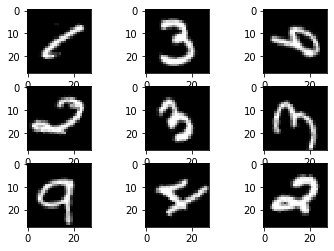

In [38]:
# imageDataGenerator
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
#datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
#datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)

# 이미지 백색화 => noise 제거(변수 간 상관도를 없앰 : PCA)
datagen = ImageDataGenerator(zca_whitening=True)
datagen = ImageDataGenerator(rotation_range=90)
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9,
                                     save_to_dir="images",
                                     save_prefix="aug",
                                     save_format="png"):
    
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28),
                     cmap=pyplot.get_cmap("gray"))
    pyplot.show()
    break

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


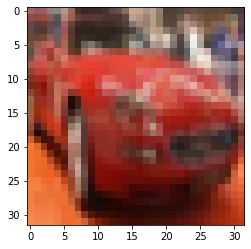

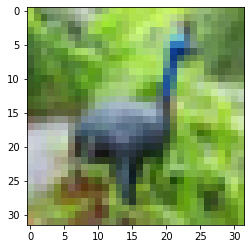

In [18]:
import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Sequential
from keras.datasets import cifar10
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.layers import Activation
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")
NB_CLASSES = 10
Y_train = np_utils.to_categorical(Y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(Y_test, NB_CLASSES)

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

plt.imshow(X_train[5])
plt.grid(False)
plt.show()
plt.imshow(X_train[6])
plt.grid(False)
plt.show()

In [19]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [20]:
model = Sequential()
# residual망의 영향
# 32 x 32 x 3 => 32x32x32
model.add(Conv2D(32, kernel_size=3, padding="same", input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation("relu"))
model.add(Conv2D(32, kernel_size=3, padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [21]:
model.add(Conv2D(64, kernel_size=3, padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(64, 3, 3))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

C:\Users\ICT01_24\Anaconda3\envs\tf15_test\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation("softmax"))
model.summary()
model.compile(loss="categorical_crossentropy", optimizer=OPTIM, metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
__________

In [23]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
                    epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 8s 209us/step - loss: 1.8091 - acc: 0.3459 - val_loss: 1.4668 - val_acc: 0.4698
Epoch 2/40
40000/40000 [==============================] - 8s 198us/step - loss: 1.3119 - acc: 0.5341 - val_loss: 1.1642 - val_acc: 0.5843
Epoch 3/40
40000/40000 [==============================] - 8s 198us/step - loss: 1.0999 - acc: 0.6131 - val_loss: 1.1653 - val_acc: 0.5750
Epoch 4/40
40000/40000 [==============================] - 8s 198us/step - loss: 0.9624 - acc: 0.6649 - val_loss: 0.8677 - val_acc: 0.6969
Epoch 5/40
40000/40000 [==============================] - 8s 199us/step - loss: 0.8653 - acc: 0.6991 - val_loss: 0.8306 - val_acc: 0.7106
Epoch 6/40
40000/40000 [==============================] - 8s 198us/step - loss: 0.7920 - acc: 0.7242 - val_loss: 0.7568 - val_acc: 0.7379
Epoch 7/40
40000/40000 [==============================] - 8s 198us/step - loss: 0.7373 - acc: 0.7431 - val_loss: 0.8744 - 

In [24]:
datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False, # 이미지 PCA 노이즈 제거
                             rotation_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=False)
datagen.fit(X_train)

In [25]:
model.fit_generator(datagen.flow(X_test, Y_test,
                                 batch_size=BATCH_SIZE),
                    samples_per_epoch=X_train.shape[0],
                    nb_epoch=NB_EPOCH,
                    verbose=VERBOSE)

Epoch 1/40
  3/390 [..............................] - ETA: 15s - loss: 1.2163 - acc: 0.6250

C:\Users\ICT01_24\Anaconda3\envs\tf15_test\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
C:\Users\ICT01_24\Anaconda3\envs\tf15_test\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., verbose=1, steps_per_epoch=390, epochs=40)`
  """


390/390 [==============================] - 14s 36ms/step - loss: 1.0513 - acc: 0.6571
Epoch 2/40
390/390 [==============================] - 14s 36ms/step - loss: 0.9792 - acc: 0.6774
Epoch 3/40
390/390 [==============================] - 14s 36ms/step - loss: 0.9442 - acc: 0.6894
Epoch 4/40
390/390 [==============================] - 14s 36ms/step - loss: 0.9214 - acc: 0.6965 1s - los
Epoch 5/40
390/390 [==============================] - 14s 36ms/step - loss: 0.8995 - acc: 0.7034
Epoch 6/40
390/390 [==============================] - 14s 36ms/step - loss: 0.8744 - acc: 0.7108
Epoch 7/40
390/390 [==============================] - 14s 36ms/step - loss: 0.8601 - acc: 0.7180
Epoch 8/40
390/390 [==============================] - 14s 36ms/step - loss: 0.8485 - acc: 0.7213
Epoch 9/40
390/390 [==============================] - 14s 36ms/step - loss: 0.8495 - acc: 0.7237
Epoch 10/40
390/390 [==============================] - 14s 36ms/step - loss: 0.8415 - acc: 0.7256 1s - loss: 0.84
Epoch 11/40
390

In [26]:
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print("\nTest accuracy:", score[1])

10000/10000 [==============================] - 1s 69us/step

Test score: 0.5852184526443481

Test accuracy: 0.817


In [27]:
# json
model_json = model.to_json()
open("cifar10_architecture.json", "w").write(model_json)
model.save_weights("cifar10_weights.h5", overwrite=True)

In [28]:
from keras.models import model_from_json
json_file = open("cifar10_architecture.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("cifar10_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [30]:
# accuracy graph를 출력해보시요.
# 이미지 cat, dog를 다운로드한 다음 위의 모델로 예측해보시요.

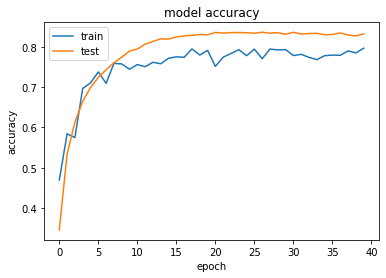

In [47]:
plt.plot(history.history["val_acc"])
plt.plot(history.history["acc"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [36]:
import numpy as np # 이미지 사이즈 일치
from imageio import imread
from skimage.transform import resize
from keras.models import model_from_json
img_names = ["cat.jpg", "dog.jpg"]
imgs = [resize(imread(img_name), (32,32)).astype("float32") for img_name in img_names]
imgs = np.array(imgs)
predictions = model.predict_classes(imgs)
print(predictions)

[3 5]


In [37]:
# 전이학습(transfer learning) Application
#  - 반지도학습(일부 데이터의 label이 없음) : KNN(주변 비슷한 애로 label 정해줌), Transductive SVM
#  - 가중치 활용 : 그대로 적용
#  - 가중치 중 일부만 활용
#  - 가중치는 그대로 두고, FFNN부분만 학습해서 사용하기

In [38]:
# Pre-Trained model, fine-tuning : FFNN부분만 Domain knowledge

PIL image size (224, 224)


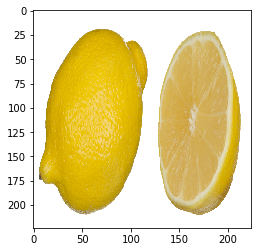

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)
[[('n07749582', 'lemon', 0.99176437), ('n07747607', 'orange', 0.008134009), ('n07754684', 'jackfruit', 4.0298346e-05)]]


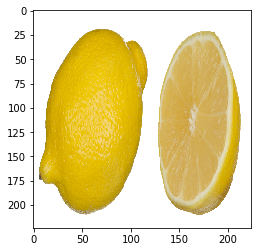

In [48]:
import PIL
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.imagenet_utils import decode_predictions
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.applications import resnet50
filename = "lemon.jpg"
original = load_img(filename, target_size=(224,224))
print("PIL image size", original.size)
plt.imshow(original)
plt.show()

numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
print("numpy array size", numpy_image.shape)

# 차원 확대 : 여러장 처리
# 1장(3차원 -> 4차원으로 확장)
image_batch =  np.expand_dims(numpy_image, axis=0)
print("image batch size", image_batch.shape)

# prepare the image for the resnet50 model
processed_image = resnet50.preprocess_input(image_batch.copy())

# Dense을 이용해서 모델을 생성
# 라벨 => 확률 : ㅣ
resnet_model = resnet50.ResNet50(weights="imagenet") # 구조를 알수없다.0

# softmax 확률(상위 3개로 예측)
predictions = resnet_model.predict(processed_image)
label = decode_predictions(predictions, top=3)
print(label)

In [ ]:
# tf.keras
# fine-tuning

In [124]:
from numpy.random import randn
import pathlib
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from matplotlib.image import imread
from keras.preprocessing import image
from keras.layers import Dense
from keras.models import Sequential

#tf.enable_eager_execution()

AUTOTUNE = tf.data.experimental.AUTOTUNE
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', fname='flower_photos', untar=True)
#data_dir = "C:/Users/ICT01_24/Documents/jeju/keras/pass/flowers/flower/flower_photos"
data_dir = pathlib.Path(data_dir)
label_names = {"daisy" : 0, "dandelion" : 1, "roses" : 2, "sunflowers" : 3, "tulips" : 4}
label_key = ["daisy", "dandelion", "roses", "sunflowers", "tulips"]

In [125]:
all_images = list(data_dir.glob("*/*"))
all_images = [str(path) for path in all_images]
random.shuffle(all_images)
all_labels = [label_names[pathlib.Path(path).parent.name] for path in all_images]
data_size = len(all_images)
train_test_split = (int)(data_size*0.2)
x_train = all_images[train_test_split:]
x_test = all_images[:train_test_split]
y_train = all_labels[train_test_split:]
y_test = all_labels[:train_test_split]
IMG_SIZE = 160
BATCH_SIZE = 32

In [126]:
def _parse_data(x, y):
    image = tf.read_file(x)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image,y

def _input_fn(x, y):
    ds = tf.data.Dataset.from_tensor_slices((x,y)) # dataset 생성
    ds = ds.map(_parse_data)
    ds = ds.shuffle(buffer_size=data_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_ds = _input_fn(x_train, y_train)
validation_ds = _input_fn(x_test, y_test)

In [127]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
VGG16_MODEL = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                          include_top=False,
                                          weights="imagenet")

In [135]:
VGG16_MODEL.trainable=False
# flatten 가중치
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
# FFNN의 가중치는 학습
prediction_layer = tf.keras.layers.Dense(len(label_names), activation="softmax")

In [136]:
# VGG16 가중치 + FFNN 가중치 학습
model = tf.keras.Sequential([VGG16_MODEL, global_average_layer, prediction_layer])

In [137]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [ ]:
history = model.fit(train_ds, epochs=100, steps_per_epoch=2, validation_steps=2,
                    validation_data=validation_ds)

Train on 2 steps, validate on 2 steps
Epoch 1/100
2/2 [==============================] - 20s 10s/step - loss: 0.8651 - acc: 0.7500 - val_loss: 1.0324 - val_acc: 0.6406
Epoch 2/100
2/2 [==============================] - 6s 3s/step - loss: 0.9044 - acc: 0.7500 - val_loss: 0.9371 - val_acc: 0.7188
Epoch 3/100
2/2 [==============================] - 6s 3s/step - loss: 0.9537 - acc: 0.6406 - val_loss: 0.8862 - val_acc: 0.7812
Epoch 4/100
2/2 [==============================] - 6s 3s/step - loss: 0.9696 - acc: 0.7188 - val_loss: 0.9309 - val_acc: 0.7188
Epoch 5/100
2/2 [==============================] - 6s 3s/step - loss: 0.8516 - acc: 0.7500 - val_loss: 0.9426 - val_acc: 0.7188
Epoch 6/100
2/2 [==============================] - 6s 3s/step - loss: 0.8633 - acc: 0.7969 - val_loss: 0.9110 - val_acc: 0.7188
Epoch 7/100
2/2 [==============================] - 6s 3s/step - loss: 0.7874 - acc: 0.8594 - val_loss: 0.8952 - val_acc: 0.7656
Epoch 8/100
2/2 [==============================] - 6s 3s/step - 

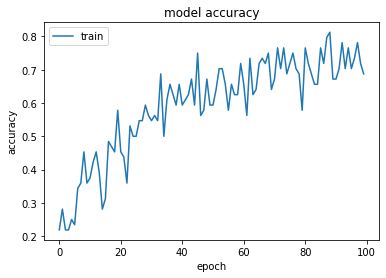

In [146]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()